## 따릉이 홈페이지에서 30분, 3시간 이용권을 만들 수 없는 이유가 나와있다.
## 독점 사용 제한과 1시간 이용권을 정기권으로 이용하면 1시간마다 반납하면 무제한으로 이용할 수 있다는 논리에서다.
## 하지만 이것은 3시간 이용권을 만들기 힘든 이유이지, 30분 이용권을 만들기 힘든 이유가 되지는 못한다.
## 그래서 사용시간별 분포를 시각화하여 서울시에게 따릉이 30분 이용권을 제안하고자 한다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df1 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")
df2 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_2.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")
df3 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_3.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")
df4 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_4.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")
df5 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_5.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")
df6 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_2017년_6.csv", encoding="EUC-KR",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="'")

In [3]:
df7 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201801_02.xlsx", head=1)
df8 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201803_04.xlsx", head=1)
df9 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201805.xlsx", head=1)
df10 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201806.xlsx", head=1)
df11 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201807.xlsx", head=1)
df12 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201808.xlsx", head=1)
df13 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201809.xlsx", head=1)
df14 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201810.xlsx", head=1)
df15 = pd.read_excel("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201811.xlsx", head=1)

In [4]:
df16 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905.csv",sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")
df17 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905(1).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")
df18 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905(2).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")
df19 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905(3).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")
df20 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905(4).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")
df21 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 시간대별 대여정보_201812~201905(5).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False, warn_bad_lines=False, quotechar="\"")

In [5]:
df22 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(1).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df23 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(2).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df24 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(3).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df25 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(4).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df26 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(5).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df27 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(6).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df28 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(7).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df29 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(8).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df30 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(9).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")
df31 = pd.read_csv("D:/OA-15245/서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv", sep=",", engine="python", na_values="\"\"", error_bad_lines=False,  quotechar="\"")

In [6]:
df1.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-01-01,0,230,영등포구청역 1번출구,정기,F,~10대,1,31.27,0.39,1680,155


In [7]:
df2.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-06-01,0,301,경복궁역 7번출구 앞,정기,F,20대,2,315.77,2.7,11640,98


In [8]:
df3.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-08-01,0,538,답십리역 8번출구 앞,정기,F,~10대,1,34.06,0.42,1830,13


In [9]:
df4.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-09-01,0,313,서울역 광장 파출소 옆,정기,F,~10대,1,54.62,0.48,2090,11


In [10]:
df5.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-10-01,0,509,이마트 버스정류소 옆,정기,F,~10대,1,182.95,1.95,8400,51


In [11]:
df6.head(1)

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-11-01,0,337,창경궁 입구,정기,F,~10대,1,10.04,0.09,390,3


In [12]:
df7.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-01-01,0,300,정동사거리,정기권,F,~10대,1,37.32,0.34,1450,23


In [13]:
df8.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-03-01,0,639,서울시립대 후문,정기권,F,20대,1,40.41,0.36,1570,7


In [14]:
df9.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-05-01,0,737,장수공원,정기권,F,~10대,1,112.17,1.19,5150,26


In [15]:
df10.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-06-01,0,1720,도봉구청 옆(중랑천변),정기권,F,~10대,1,259.46,2.17,9360,60


In [16]:
df11.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-07-01,0,516,광진메디칼 앞,정기권,F,~10대,1,109.55,1.17,5030,55


In [17]:
df12.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-08-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.79,0.4,1740,11


In [18]:
df13.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-09-01,0,746,목동2단지 상가,정기권,F,~10대,1,212.78,3.28,14140,67


In [19]:
df14.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-10-01,0,1336,성북3교 위,정기권,F,~10대,1,73.62,0.66,2860,16


In [20]:
df15.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.4,1710,9


In [21]:
df16.head(1)

,2018-12-01,00,01721,1721. 창동역 2번출구,정기,AGE_001,정기.1,1,25.95,0.26,1130.00,4
0,2018-12-01,0,3511,3511. 응봉역 1번출구,정기,AGE_001,정기,1,52.59,0.39,1660.0,72


In [22]:
df17.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2018-12-01,0,1721,1721. 창동역 2번출구,정기권,\N,~10대,1,25.95,0.26,1130.0,4


#### 원래 데이터가 30개라고 떴는데 막상 받아보니 31개였다. df16과 df17은 같은 데이터였다.  
#### df16은 서울특별시 공공자전거 시간대별 대여정보_201812~201905 이고,  
#### df17은 서울특별시 공공자전거 시간대별 대여정보_201812~201905(1) 이다.  
#### 같은 데이터인가보다(df16은 잘못 올린듯싶다).  
#### 그래서 df16은 무시하겠다.

In [23]:
df18.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-04-13,17,104,104. 합정역 1번출구 앞,일일권,F,20대,3,572.92,6.14,26510.0,216


In [24]:
df19.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-05,22,613,613. 신설동역 10번출구 앞,단체권,NaN,20대,2,224.77,2.39,10320.0,105


In [25]:
df20.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-24,9,1824,1824. 독산근린공원 입구,정기권,NaN,20대,1,11.54,0.13,550.0,2


In [26]:
df21.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-24,9,1824,1824. 독산근린공원 입구,정기권,NaN,20대,1,11.54,0.13,550.0,2


In [27]:
df22.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-06-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,42.91,0.40,1720.0,10


In [28]:
df23.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-06-18,18,2128,2128. 관악구청교차로,정기권,M,40대,1,31.71,0.21,910.0,7


In [29]:
df24.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-07-04,21,1327,1327. 상월곡역 3번출구,정기권,NaN,20대,2,218.89,2.29,9870.0,58


In [30]:
df25.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-07-22,17,2002,2002. 노들역 1번출구,정기권,NaN,30대,1,350.94,3.43,14770.0,67


In [31]:
df26.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-08-14,22,951,951. 연신내역 6번출구옆,정기권,NaN,20대,1,78.46,0.59,2540.0,16


In [32]:
df27.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-09-02,12,1425,1425. 용마문화복지센터,정기권,M,20대,1,0.00,0.00,0.0,6


In [33]:
df28.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-09-24,2,242,242. 신길선원가와인아파트 앞,정기권,NaN,20대,1,53.22,0.65,2800.0,27


In [34]:
df29.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-10-11,5,121,121. 마포소방서 앞,정기권,M,30대,1,22.86,0.18,780.0,4


In [35]:
df30.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-10-26,22,2003,2003. 사육신공원앞,정기권,F,70대~,1,75.12,0.63,2710.0,25


In [36]:
df31.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-11-16,10,415,415. DMC역 9번출구 앞,정기권,NaN,30대,1,17.96,0.17,720.0,3


#### df1-df6, df7-df16, df17-df31 데이터의 차이점이 있다.
#### 각각 2017년, 2018년, 2019년 데이터라 그런가보다.
#### column의 이름이     대여소->대여소->대여소명,     이동거리(M)->이동거리->이동거리,     이동시간(분)->이동시간->사용시간으로 바뀌었다.

In [37]:
df1.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)
df2.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)
df3.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)
df4.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)
df5.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)
df6.rename(columns={"대여소":"대여소명", "이동거리(M)":"이동거리", "이동시간(분)":"사용시간"}, inplace=True)

df7.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df8.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df9.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df10.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df11.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df12.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df13.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df14.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df15.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)
df16.rename(columns={"대여소":"대여소명", "이동시간":"사용시간"}, inplace=True)

In [38]:
df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31]
# df16 제외함

df = pd.concat(df, axis=0, join='outer', ignore_index=True)

In [39]:
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2017-01-01,0,230,영등포구청역 1번출구,정기,F,~10대,1,31.27,0.39,1680.0,155
1,2017-01-01,0,315,신한은행 안국역지점 옆,정기,F,20대,1,47.32,0.55,2390.0,15
2,2017-01-01,0,328,탑골공원 앞,정기,F,20대,1,57.92,0.52,2250.0,13
3,2017-01-01,0,175,홍연2교옆,정기,F,20대,1,133.29,1.53,6600.0,43
4,2017-01-01,0,817,삼각지역 4번출구 앞,정기,F,20대,1,33.88,0.32,1380.0,8
5,2017-01-01,0,906,연신내역 5번출구150M 아래,정기,F,20대,1,31.24,0.37,1610.0,11
6,2017-01-01,0,927,연신내역 3번출구 인근,정기,F,20대,1,113.69,0.77,3300.0,21
7,2017-01-01,0,307,서울역사박물관 앞,정기,F,30대,2,109.93,1.05,4550.0,43
8,2017-01-01,0,327,낙원상가 옆,정기,F,30대,1,56.63,0.51,2200.0,18
9,2017-01-01,0,335,종로3가역 15번출구 앞,정기,F,30대,1,72.5,0.83,3590.0,24


In [40]:
df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]+df6.shape[0]+df7.shape[0]+df8.shape[0]+df9.shape[0]+df10.shape[0]+df11.shape[0]+df12.shape[0]+df13.shape[0]+df14.shape[0]+df15.shape[0]+df17.shape[0]+df18.shape[0]+df19.shape[0]+df20.shape[0]+df21.shape[0]+df22.shape[0]+df23.shape[0]+df24.shape[0]+df25.shape[0]+df26.shape[0]+df27.shape[0]+df28.shape[0]+df29.shape[0]+df30.shape[0]+df31.shape[0]

23548850

#### 각각의 행을 합하였더니 병합된 df와 같음->제대로 병합됨을 확인함.

In [41]:
df.isnull().sum()

대여일자            0
대여시간            0
대여소번호          33
대여소명          941
대여구분코드          0
성별        6820639
연령대코드      134002
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
df['대여시간'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [44]:
df['대여구분코드'].unique()

array(['정기', '일일(회원)', '일일(비회원)', '단체', '일일(2시간권)', '정기(2시간권)', '정기권',
       '일일권', '일일권(비회원)', '단체권'], dtype=object)

In [45]:
df1['대여구분코드'].unique() #2017년 대표 데이터

array(['정기', '일일(회원)', '일일(비회원)', '단체', '일일(2시간권)', '정기(2시간권)'],
      dtype=object)

In [46]:
df7['대여구분코드'].unique() #2018년 대표 데이터

array(['정기권', '일일권', '일일권(비회원)', '단체권'], dtype=object)

In [47]:
df17['대여구분코드'].unique() #2019년 대표 데이터

array(['정기권', '일일권', '단체권', '일일권(비회원)'], dtype=object)

In [48]:
df['대여구분코드'].replace("정기", "정기권",inplace=True)
df['대여구분코드'].replace("일일(회원)", "일일권", inplace=True)
df['대여구분코드'].replace("일일(비회원)", "일일권(비회원)", inplace=True)
df['대여구분코드'].replace("단체", "단체권", inplace=True)
df['대여구분코드'].replace("일일(2시간권)", "일일권", inplace=True)
df['대여구분코드'].replace("정기(2시간권)", "정기권", inplace=True)

In [49]:
df['대여구분코드'].unique()

array(['정기권', '일일권', '일일권(비회원)', '단체권'], dtype=object)

In [50]:
df['성별'].unique()

array(['F', 'M', '\\N', 'f', 'm'], dtype=object)

In [51]:
df['성별'].replace("f", "F", inplace=True)
df['성별'].replace("m", "M", inplace=True)
df['성별'].replace("\\N", np.nan, inplace=True)

In [52]:
df['성별'].unique()

array(['F', 'M', nan], dtype=object)

In [53]:
df['연령대코드'].unique()

array(['~10대', '20대', '30대', '40대', '60대', '50대', '70대~'], dtype=object)

In [54]:
df['이용건수'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10,  8, 12, 15, 11, 14, 13, 29, 18,
       23, 20, 19, 16, 33, 75, 30, 86, 17, 47, 28, 32, 21, 22, 24, 27, 59,
       48, 57, 68, 26, 58, 97, 78, 51, 63, 98, 71, 84, 72, 79, 96, 74, 55,
       49, 52, 31, 34, 45, 66, 60, 54, 25, 36, 39, 41, 35, 42, 37, 44, 38,
       43], dtype=int64)

In [55]:
Cal = pd.to_numeric(df['운동량'], errors='coerce')
df['운동량'] = Cal

co2 = pd.to_numeric(df['탄소량'], errors='coerce')
df['탄소량'] = co2

m = pd.to_numeric(df['이동거리'], errors='coerce')
df['이동거리'] = m

In [56]:
df['대여구분코드'].unique()

array(['정기권', '일일권', '일일권(비회원)', '단체권'], dtype=object)

In [57]:
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2017-01-01,0,230,영등포구청역 1번출구,정기권,F,~10대,1,31.27,0.39,1680.0,155
1,2017-01-01,0,315,신한은행 안국역지점 옆,정기권,F,20대,1,47.32,0.55,2390.0,15
2,2017-01-01,0,328,탑골공원 앞,정기권,F,20대,1,57.92,0.52,2250.0,13
3,2017-01-01,0,175,홍연2교옆,정기권,F,20대,1,133.29,1.53,6600.0,43
4,2017-01-01,0,817,삼각지역 4번출구 앞,정기권,F,20대,1,33.88,0.32,1380.0,8
5,2017-01-01,0,906,연신내역 5번출구150M 아래,정기권,F,20대,1,31.24,0.37,1610.0,11
6,2017-01-01,0,927,연신내역 3번출구 인근,정기권,F,20대,1,113.69,0.77,3300.0,21
7,2017-01-01,0,307,서울역사박물관 앞,정기권,F,30대,2,109.93,1.05,4550.0,43
8,2017-01-01,0,327,낙원상가 옆,정기권,F,30대,1,56.63,0.51,2200.0,18
9,2017-01-01,0,335,종로3가역 15번출구 앞,정기권,F,30대,1,72.50,0.83,3590.0,24


In [58]:
df = df[df['사용시간']<=120]

## 정기권 특성상 출퇴근, 등하교 등에 사용하기 때문에 사용시간에 x2를 해주어야한다.
## 그래서 정기권과 정기권이 아닌 것으로 구분하여 분석한다.
## 정기권을 제외한 일일권, 일일권(비회원), 단체권만 분석

In [59]:
df_not_every = df[(df['대여구분코드']=='일일권') | (df['대여구분코드']=='일일권(비회원)') | (df['대여구분코드']=='단체권')]

In [60]:
df_not_every

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
63,2017-01-01,0,175,홍연2교옆,일일권,F,20대,1,202.08,2.82,12150.0,60
64,2017-01-01,0,811,녹사평역1번출구,일일권,F,20대,1,44.45,0.57,2440.0,22
65,2017-01-01,0,639,서울시립대 후문,일일권,F,20대,1,55.20,0.61,2630.0,13
66,2017-01-01,0,567,성수역 2번출구 앞,일일권,F,30대,1,25.74,0.29,1250.0,10
67,2017-01-01,0,180,충정로역 7번출구 뒤,일일권,M,~10대,1,40.55,0.37,1600.0,6
69,2017-01-01,0,328,탑골공원 앞,일일권,M,20대,1,60.23,0.53,2270.0,13
70,2017-01-01,0,112,극동방송국 앞,일일권,M,20대,1,61.54,0.60,2590.0,14
71,2017-01-01,0,536,행당역 2번출구 앞,일일권,M,20대,1,44.21,0.34,1450.0,9
72,2017-01-01,0,825,서빙고동 주민센터 앞,일일권,M,30대,1,87.00,0.78,3380.0,14
73,2017-01-01,0,330,청계천 한빛광장,일일권,M,40대,1,63.20,0.53,2280.0,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D4FCC34B00>]],
      dtype=object)

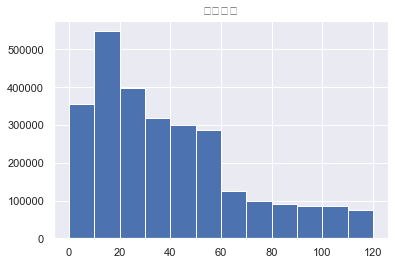

In [61]:
df_not_every.hist(column='사용시간', bins=12)

In [62]:
((df_not_every[df_not_every['사용시간']<=30])['사용시간'].count()) / ((df_not_every['사용시간']).count())

0.48305102183370174

## 히스토그램으로 보면 30분 이하 사용자들이 매우 많고
## 실제로 48.3%의 사람들이 30분 이하로 사용하고 있다.

## 정기권 분석

In [63]:
df_every = df[df['대여구분코드']=='정기권']

In [64]:
df_every

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
1,2017-01-01,0,315,신한은행 안국역지점 옆,정기권,F,20대,1,47.32,0.55,2390.0,15
2,2017-01-01,0,328,탑골공원 앞,정기권,F,20대,1,57.92,0.52,2250.0,13
3,2017-01-01,0,175,홍연2교옆,정기권,F,20대,1,133.29,1.53,6600.0,43
4,2017-01-01,0,817,삼각지역 4번출구 앞,정기권,F,20대,1,33.88,0.32,1380.0,8
5,2017-01-01,0,906,연신내역 5번출구150M 아래,정기권,F,20대,1,31.24,0.37,1610.0,11
6,2017-01-01,0,927,연신내역 3번출구 인근,정기권,F,20대,1,113.69,0.77,3300.0,21
7,2017-01-01,0,307,서울역사박물관 앞,정기권,F,30대,2,109.93,1.05,4550.0,43
8,2017-01-01,0,327,낙원상가 옆,정기권,F,30대,1,56.63,0.51,2200.0,18
9,2017-01-01,0,335,종로3가역 15번출구 앞,정기권,F,30대,1,72.50,0.83,3590.0,24
10,2017-01-01,0,113,홍대입구역 2번출구 앞,정기권,F,30대,1,62.73,0.61,2640.0,16


In [65]:
df_every['사용시간'] = df_every['사용시간'] * 2

In [66]:
df_every

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
1,2017-01-01,0,315,신한은행 안국역지점 옆,정기권,F,20대,1,47.32,0.55,2390.0,30
2,2017-01-01,0,328,탑골공원 앞,정기권,F,20대,1,57.92,0.52,2250.0,26
3,2017-01-01,0,175,홍연2교옆,정기권,F,20대,1,133.29,1.53,6600.0,86
4,2017-01-01,0,817,삼각지역 4번출구 앞,정기권,F,20대,1,33.88,0.32,1380.0,16
5,2017-01-01,0,906,연신내역 5번출구150M 아래,정기권,F,20대,1,31.24,0.37,1610.0,22
6,2017-01-01,0,927,연신내역 3번출구 인근,정기권,F,20대,1,113.69,0.77,3300.0,42
7,2017-01-01,0,307,서울역사박물관 앞,정기권,F,30대,2,109.93,1.05,4550.0,86
8,2017-01-01,0,327,낙원상가 옆,정기권,F,30대,1,56.63,0.51,2200.0,36
9,2017-01-01,0,335,종로3가역 15번출구 앞,정기권,F,30대,1,72.50,0.83,3590.0,48
10,2017-01-01,0,113,홍대입구역 2번출구 앞,정기권,F,30대,1,62.73,0.61,2640.0,32


In [67]:
df_every = df_every[df_every['사용시간']<=120]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D49016BE10>]],
      dtype=object)

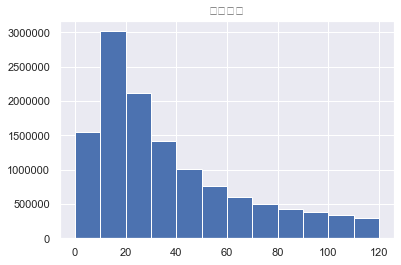

In [68]:
df_every.hist(column='사용시간', bins=12)

#### 똑같은 사람이 출근할 때 A에서 빌리고, 퇴근할 때 B에서 빌려서 각각 10분씩 탔다고 하면
#### 총 20분을 탄 것이기 때문에 x2를 해주었다.
#### 그렇게 되면 한 사람이 20분 탄 것이 데이터 2개로 나타난다.
#### 원래는 x2를 해주었으므로 hist에서 y 값을 반으로 줄여야하는데
#### 그렇게 해도 시각화는 똑같이 보이니 그대로 두겠다.
#### (숫자를 보는게 아니라 비율을 보려고 하는 것이기 때문)

In [69]:
((df_every[df_every['사용시간']<=30])['사용시간'].count()) / ((df_every['사용시간']).count())

0.564785209281022

## 히스토그램으로 보면 30분 이하 사용자들이 매우 많고
## 실제로 정기권 사용자 중 56.5%의 사람들이 30분 이하로 사용하고 있다.
## (출퇴근, 등하교를 고려하여 사용시간에 x2를 해준 결과임에도 불구하고 30분 이하 사용자들이 매우 많다.)

## 따라서 서울시에게 따릉이 30분 이용권을 추가해줄 것을 요청한다.